In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

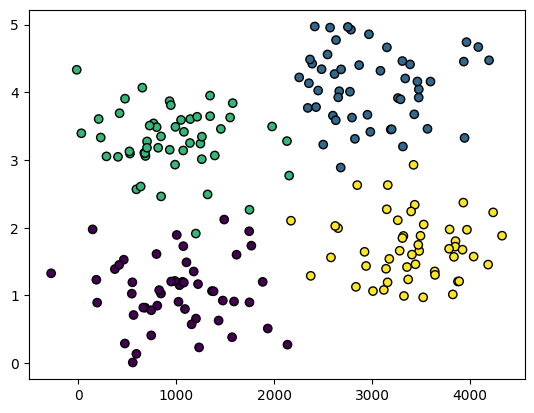

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter = 10000, random_state=1).fit(X, y)

In [ ]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.02483834  0.56788825 -0.72943269 -0.43127099 -0.86314819 -0.57639013]
 [-0.4110767  -0.14321967 -0.05875036  0.24294034 -0.36822607  0.48614472]]

Веса между скрытым и выходным слоем:
[[-0.45953003 -0.56839378  0.36778161  0.62936427]
 [-0.22747072  0.20124783  0.39759173  0.81969616]
 [-0.51782365 -0.83525525 -0.6996025   0.46881469]
 [-0.48040683 -0.26543701  0.90471677 -0.12336374]
 [ 0.52020613 -0.50556645  0.44309748  0.30447332]
 [-0.65309192  0.25614629  0.93912084  0.21604219]]


In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.02483834 -0.4110767 ], 
0 1 [ 0.56788825 -0.14321967], 
0 2 [-0.72943269 -0.05875036], 
0 3 [-0.43127099  0.24294034], 
0 4 [-0.86314819 -0.36822607], 
0 5 [-0.57639013  0.48614472], 

1 0 [-0.45953003 -0.22747072 -0.51782365 -0.48040683  0.52020613 -0.65309192], 
1 1 [-0.56839378  0.20124783 -0.83525525 -0.26543701 -0.50556645  0.25614629], 
1 2 [ 0.36778161  0.39759173 -0.6996025   0.90471677  0.44309748  0.93912084], 
1 3 [ 0.62936427  0.81969616  0.46881469 -0.12336374  0.30447332  0.21604219], 



In [ ]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.63452584  0.49331111 -0.94780667  0.16453594  0.10490243 -0.00209825]

Веса смещения для выходного слоя:
[-0.16781747  0.30005922 -0.88677962 -0.26321921]


In [ ]:
confusion_matrix(y, clf.predict(X))

array([[49,  0,  1,  0],
       [ 0, 49,  0,  1],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

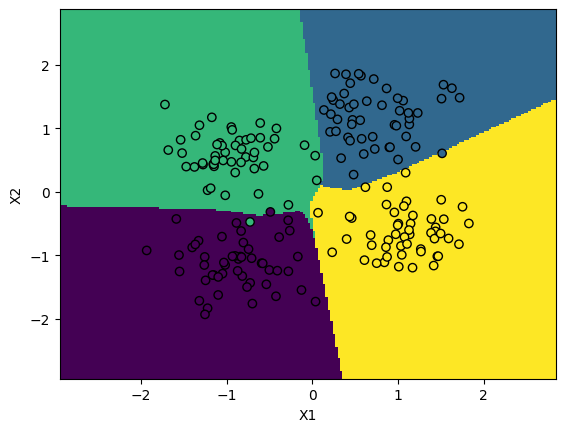

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black', linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Создание датасета для заданий:


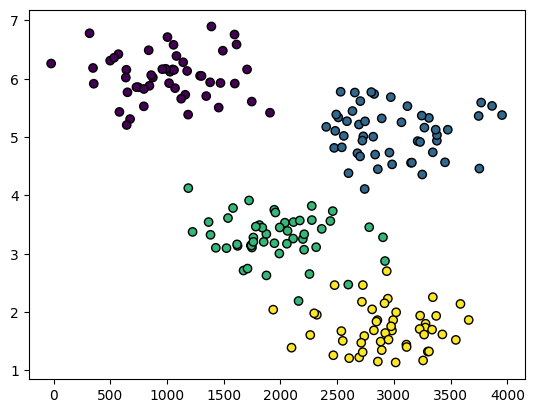

In [ ]:
blob_centers = ([1, 6], [3, 5], [2, 3.3], [3, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.4,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
scaller = StandardScaler()

In [ ]:
X_norm = scaller.fit_transform(X)

1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [ ]:
persep_1 = MLPClassifier(hidden_layer_sizes =(1,), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
persep_2 = MLPClassifier(hidden_layer_sizes =(2,), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
persep_10 = MLPClassifier(hidden_layer_sizes =(10,), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
persep_100 = MLPClassifier(hidden_layer_sizes =(100,), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
accuracy_score(y, persep_1.predict(X_norm))

0.5

In [ ]:
accuracy_score(y, persep_2.predict(X_norm))

0.94

In [ ]:
accuracy_score(y, persep_10.predict(X_norm))

0.98

In [ ]:
accuracy_score(y, persep_100.predict(X_norm))

0.98

Вывод: Чем больше нейронов - тем больше точность, но достаточное колличество нейронов для данной модели - 10, потом, вероятно, идет прибавка точности не стоящей затраты вычислительной мощности на обучение и предсказание

2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [ ]:
persep_2_6 = MLPClassifier(hidden_layer_sizes =(6, 2), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
persep_3_6 = MLPClassifier(hidden_layer_sizes =(6, 3), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
persep_10_6 = MLPClassifier(hidden_layer_sizes =(6, 10), max_iter = 10000, random_state = 1).fit(X_norm, y)

In [ ]:
accuracy_score(y, persep_2_6.predict(X_norm))

0.98

In [ ]:
accuracy_score(y, persep_3_6.predict(X_norm))

0.985

In [ ]:
accuracy_score(y, persep_10_6.predict(X_norm))

0.985

Вывод: Чем больше слоев - тем больше точность, но достаточное колличество слоев для данной модели - 1, потом, вероятно, идет прибавка точности не стоящей затраты вычислительной мощности на обучение и предсказание

3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [ ]:
persep_2_6.coefs_

[array([[-0.27621838,  1.23865405, -1.09041576,  0.8126789 , -1.0745322 ,
          0.25828082],
        [-0.36748971, -0.96069715,  1.43401074,  1.39818428,  0.33468327,
          1.61353169]]),
 array([[-0.65041946, -0.28233421],
        [ 0.06606222,  1.61632551],
        [ 1.92929732, -1.06137596],
        [ 2.13995625,  1.18005336],
        [-0.27033091, -1.58303601],
        [ 1.08749864,  1.06881118]]),
 array([[ 1.47695977,  0.99354824, -0.17069986, -2.1659073 ],
        [-1.1673456 ,  0.65924806,  0.55456685,  1.82082934]])]

In [ ]:
persep_2_6.intercepts_

[array([-0.61360366,  0.70672776, -0.88298494,  0.69641045,  0.52624577,
         0.39655361]),
 array([-0.19838187, -0.27001352]),
 array([-0.49862612, -1.35480101,  1.3144664 , -1.09854655])]

4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
import time

In [ ]:
start = time.time()
persep_ez = MLPClassifier(hidden_layer_sizes =(6,), max_iter = 10000, random_state = 1).fit(X_norm, y)
end = time.time()
print(end - start)

0.7761032581329346


In [ ]:
start = time.time()
persep_ez = MLPClassifier(hidden_layer_sizes =(6, 10), max_iter = 10000, random_state = 1).fit(X_norm, y)
end = time.time()
print(end - start)

0.9003207683563232


Вывод: Как и ожидалось обучение более глубокой модели происходилодольше за счет наличия скрытых слоев

5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = scaller.fit_transform(data.data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
perseptron = MLPClassifier(hidden_layer_sizes =(6, ), max_iter = 10000, random_state = 1).fit(X_train, y_train)

In [ ]:
y_pred = perseptron.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [1]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
X = scaller.fit_transform(data.data)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
perseptron = MLPClassifier(hidden_layer_sizes =(6, ), max_iter = 10000, random_state = 1).fit(X_train, y_train)

In [ ]:
y_pred = perseptron.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)